# Labolatorium 6: Echo State Networks

In [15]:
import torch
from matplotlib import pyplot as plt

## Zadanie 1 Predykcja wartości jednowymiarowego szeregu czasowego

In [3]:
import auto_esn.utils.dataset_loader as dl
from auto_esn.datasets.df import MackeyGlass

mg_clean = dl.loader_explicit(MackeyGlass, test_size=400, max_samples=1000)

0.01693565884635574


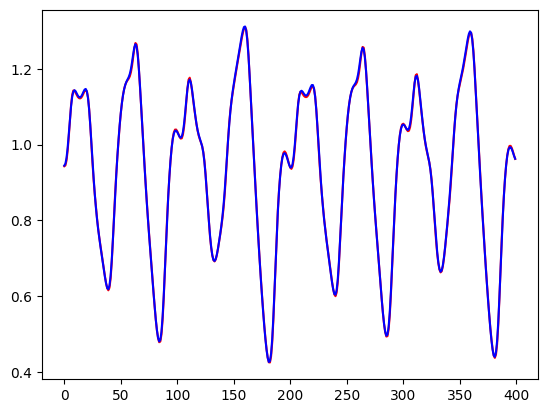

In [9]:
from auto_esn.esn.esn import GroupedDeepESN
from auto_esn.esn.reservoir.util import NRMSELoss

nrmse = NRMSELoss()

X, X_test, y, y_test = mg_clean()

esn = GroupedDeepESN(num_layers=(1,))

# fit
esn.fit(X, y)

# predict
output = esn(X_test)

# evaluate
n = nrmse(output, y_test).item()

print(n)

# visualize
last = 400
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

In [10]:
from auto_esn.datasets.df import Sunspot
sunspot = dl.loader_explicit(Sunspot, test_size=600)

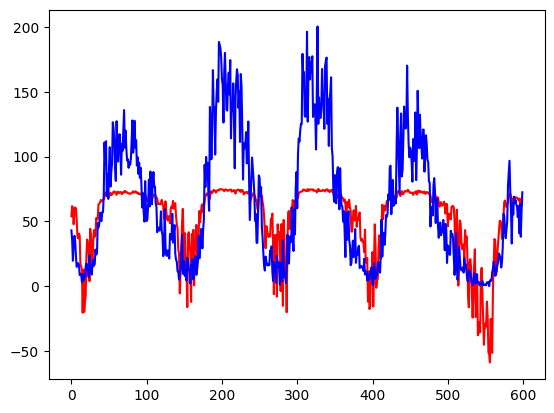

In [19]:
X, X_test, y, y_test = sunspot()
esn = GroupedDeepESN(num_layers=(1,))
esn.fit(X, y)
output = esn(X_test)
last = 600
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

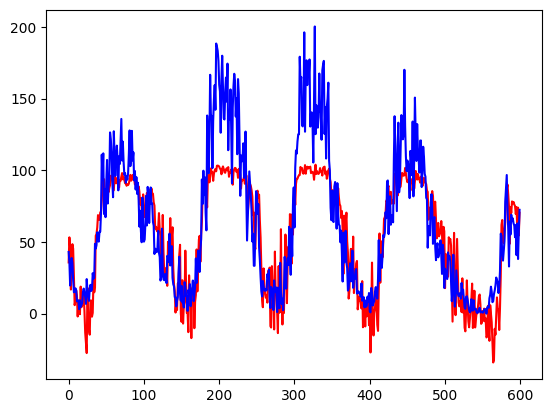

In [31]:
from auto_esn.esn.reservoir.activation import self_normalizing_default, tanh
esn = GroupedDeepESN(
    num_layers=(1,),
    activation=self_normalizing_default(leaky_rate=1.0, spectral_radius=500)
)
esn.fit(X, y)
output = esn(X_test)
last = 600
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

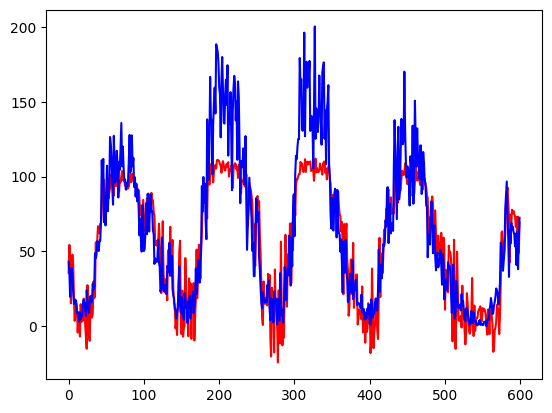

In [34]:
from auto_esn.esn.reservoir.activation import self_normalizing_default, tanh
esn = GroupedDeepESN(
    num_layers=(1,),
    hidden_size=100,
    activation=self_normalizing_default(leaky_rate=1.0, spectral_radius=500)
)
esn.fit(X, y)
output = esn(X_test)
last = 600
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

In [ ]:
output = esn(X_test)
last = 600
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

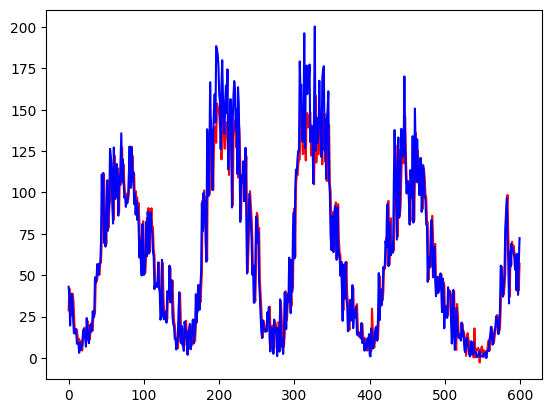

In [33]:
esn = GroupedDeepESN(
    num_layers=(1,),
    activation=tanh()
)
esn.fit(X, y)
output = esn(X_test)
last = 600
plt.plot(range(last), output.view(-1).detach().numpy()[-last:], 'r')
plt.plot(range(last), y_test.view(-1).detach().numpy()[-last:], 'b')
plt.show()

## Zadanie 2 Predykcja wartości wielowymiarowego szeregu czasowego

Size of X: torch.Size([600, 1]), X_test: torch.Size([400, 1]), y: torch.Size([600, 1]), y_test: torch.Size([400, 1])
Size of doubled X: torch.Size([600, 2]), X_test: torch.Size([400, 2]), y: torch.Size([600, 2]), y_test: torch.Size([400, 2])
Shape of output: torch.Size([400, 2])
0.007996119778430079


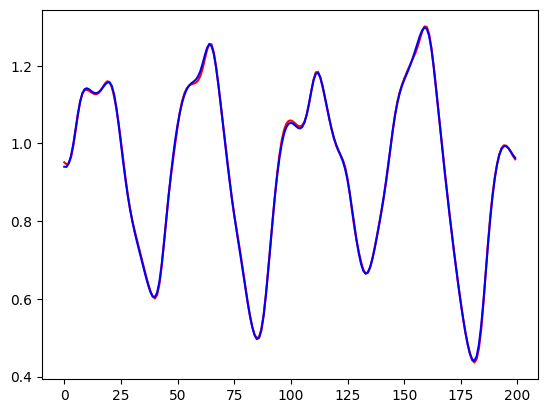

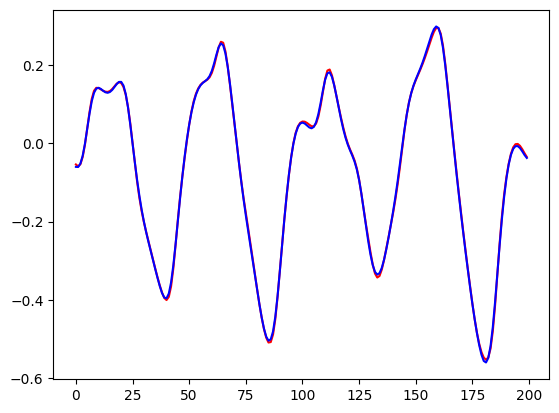

In [16]:

X, X_test, y, y_test = mg_clean()

print(f"Size of X: {X.shape}, X_test: {X_test.shape}, y: {y.shape}, y_test: {y_test.shape}")
X = torch.cat((X, X - 1), dim=1)
y = torch.cat((y, y - 1), dim=1)
X_test = torch.cat((X_test, X_test - 1), dim=1)
y_test = torch.cat((y_test, y_test - 1), dim=1)
print(f"Size of doubled X: {X.shape}, X_test: {X_test.shape}, y: {y.shape}, y_test: {y_test.shape}")

# initialize the esn
esn = GroupedDeepESN(
    input_size=2,
    num_layers=(1,),
    output_dim=2
)

# fit
esn.fit(X, y)

# predict
output = esn(X_test)
print(f"Shape of output: {output.shape}")

# evaluate
n = nrmse(output, y_test).item()
print(n)

# plot
last = 200
# we have 2dimensional input, so we have to plot two series for ground truth and for prediction
# plot original prediction
plt.plot(range(last), output[:, 0].view(-1).detach().numpy()[-last:], 'r')
# plot original ground truth
plt.plot(range(last), y_test[:, 0].view(-1).detach().numpy()[-last:], 'b')
plt.show()
# plot shifted prediction
plt.plot(range(last), output[:, 1].view(-1).detach().numpy()[-last:], 'r')
# plot shifted ground truth
plt.plot(range(last), y_test[:, 1].view(-1).detach().numpy()[-last:], 'b')
plt.show()

Size of X: torch.Size([2571, 1]), X_test: torch.Size([600, 1]), y: torch.Size([2571, 1]), y_test: torch.Size([600, 1])
Size of doubled X: torch.Size([2571, 2]), X_test: torch.Size([600, 2]), y: torch.Size([2571, 2]), y_test: torch.Size([600, 2])
Shape of output: torch.Size([600, 2])
0.38389789326977863


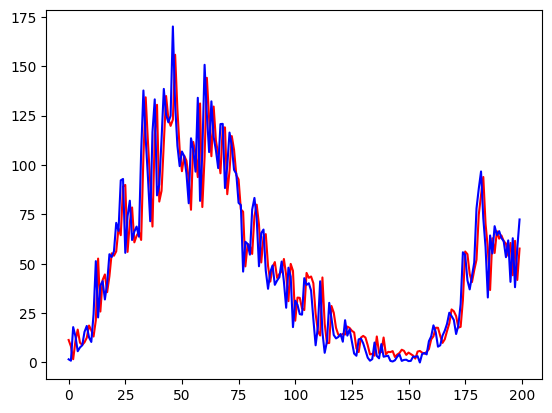

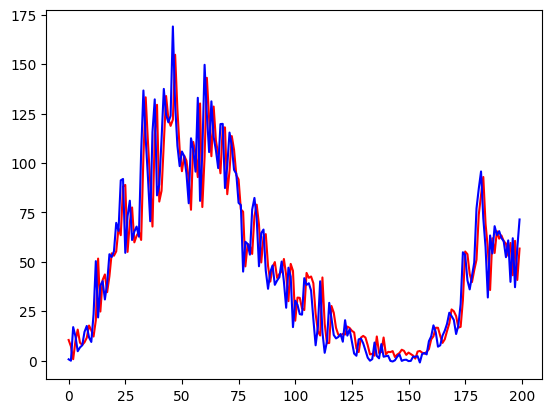

In [35]:

X, X_test, y, y_test = sunspot()

print(f"Size of X: {X.shape}, X_test: {X_test.shape}, y: {y.shape}, y_test: {y_test.shape}")
X = torch.cat((X, X - 1), dim=1)
y = torch.cat((y, y - 1), dim=1)
X_test = torch.cat((X_test, X_test - 1), dim=1)
y_test = torch.cat((y_test, y_test - 1), dim=1)
print(f"Size of doubled X: {X.shape}, X_test: {X_test.shape}, y: {y.shape}, y_test: {y_test.shape}")

# initialize the esn
esn = GroupedDeepESN(
    input_size=2,
    num_layers=(1,),
    output_dim=2,
    activation=tanh()
)

# fit
esn.fit(X, y)

# predict
output = esn(X_test)
print(f"Shape of output: {output.shape}")

# evaluate
n = nrmse(output, y_test).item()
print(n)

# plot
last = 200
# we have 2dimensional input, so we have to plot two series for ground truth and for prediction
# plot original prediction
plt.plot(range(last), output[:, 0].view(-1).detach().numpy()[-last:], 'r')
# plot original ground truth
plt.plot(range(last), y_test[:, 0].view(-1).detach().numpy()[-last:], 'b')
plt.show()
# plot shifted prediction
plt.plot(range(last), output[:, 1].view(-1).detach().numpy()[-last:], 'r')
# plot shifted ground truth
plt.plot(range(last), y_test[:, 1].view(-1).detach().numpy()[-last:], 'b')
plt.show()

## Zadanie 3 Ekstrapolacja szeregu czasowego - przewidywanie wartości wdłuższym horyzoncie czasowym

In [26]:
from auto_esn.esn.reservoir.initialization import CompositeInitializer, WeightInitializer
from auto_esn.datasets.predefined import DatasetType, PredefinedDataset

extrapolation_steps = 100

# You can also use PredefinedDataset if you wish
dataset = PredefinedDataset(DatasetType.MackeyGlass).load(val_size=0, test_size=extrapolation_steps)

def extrapolate(esn):
    # fit
    esn.fit(dataset.x_train, dataset.y_train)

    # esn already has the state after consuming whole training dataset
    # let's start from first element in test dataset and let it extrapolate further
    val = dataset.x_test[0:1]
    result = []
    for j in range(extrapolation_steps):  # 100 steps ahead
        val = esn(val)  # (1,1) tensor
        result.append(val)

    res = torch.vstack(result)

    # evaluate
    err = nrmse(res, dataset.y_test).item()
    print(f"Extrapolation error: {err}")

    # plot validation set

    plt.plot(range(extrapolation_steps), res.view(-1).detach().numpy(), 'r', )
    plt.plot(range(extrapolation_steps), dataset.y_test.view(-1).detach().numpy(), 'b')
    plt.title("Validation set results")
    plt.show()

Extrapolation error: 1.0884875960364007


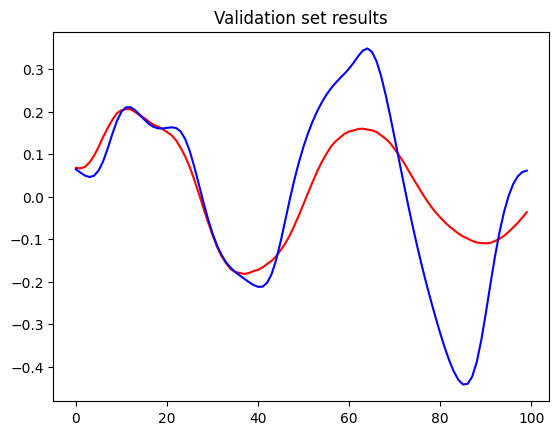

In [27]:
# now choose activation and configure it
activation = self_normalizing_default(leaky_rate=1., spectral_radius=500)

# initialize the esn
esn = GroupedDeepESN(
    num_layers=(1,),
    hidden_size=500,
    activation=activation
)

extrapolate(esn)

Extrapolation error: 0.8570678345025804


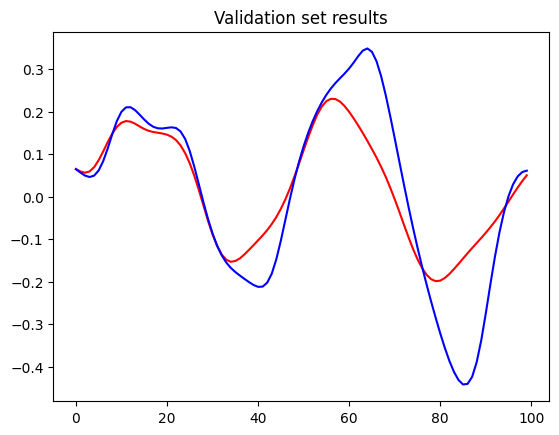

In [28]:
esn = GroupedDeepESN(
    groups=3,
    num_layers=(3, 3, 3),
    hidden_size=500,
    regularization=0.1,
    activation=activation
)

extrapolate(esn)

In [23]:
def regular_graph_initializer(seed, degree):
    # initialize input weights with uniform distribution from -1 to 1 and specified seed to reproduce results
    input_weight = CompositeInitializer().with_seed(seed).uniform()

    reservoir_weight = CompositeInitializer() \
        .with_seed(seed) \
        .uniform() \
        .regular_graph(degree) \
        .spectral_normalize() \
        .scale(1.)

    return WeightInitializer(weight_ih_init=input_weight, weight_hh_init=reservoir_weight)

/home/pkopel/Projects/ComplexSystems/auto_esn/esn/reservoir/util.py:56: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return torch.from_numpy(adjacency_matrix(G).toarray())


Extrapolation error: 0.3796604595606528


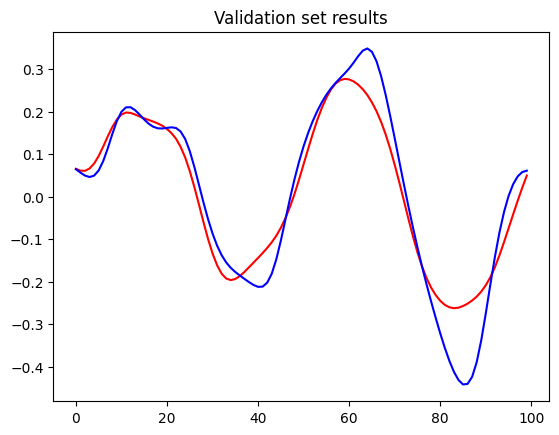

In [29]:
esn = GroupedDeepESN(
    groups=3,
    num_layers=(3, 3, 3),
    hidden_size=500,
    initializer=regular_graph_initializer(seed=6, degree=100),
    regularization=0.1,
    activation=activation
)

extrapolate(esn)